<h1 style="color:blue">Import Libraries</h1>

In [40]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [42]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-AMTPREK;'  
    'DATABASE=instant;'
    'Trusted_Connection=yes;'
)

In [43]:
conn = pyodbc.connect(conn_str)

In [44]:
query = "SELECT * FROM shopping_trends"
df = pd.read_sql(query, conn)
df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


<h1 style="color:blue">Data Overview</h1>

In [12]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
df.tail()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [14]:
df.shape

(3900, 19)

In [15]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [18]:
df.drop(columns=['Customer_ID'], inplace=True)
df.describe()

,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [19]:
#check for duplicates 
df.duplicated().sum()

0

In [22]:
df['Gender'] = df['Gender'].str.strip().str.lower()

<h2 style="color:orange">Top Spenders</h2>

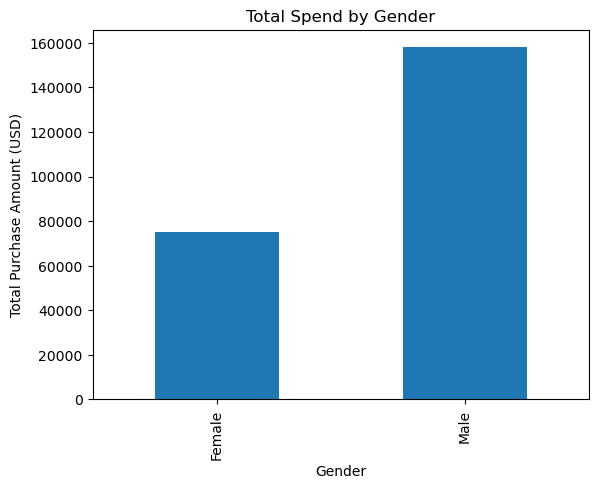

In [49]:
df.groupby('Gender')['Purchase_Amount_USD'].sum().plot(kind='bar')
plt.title('Total Spend by Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

<h2 style="color:orange">Most Purchased Categories</h2>

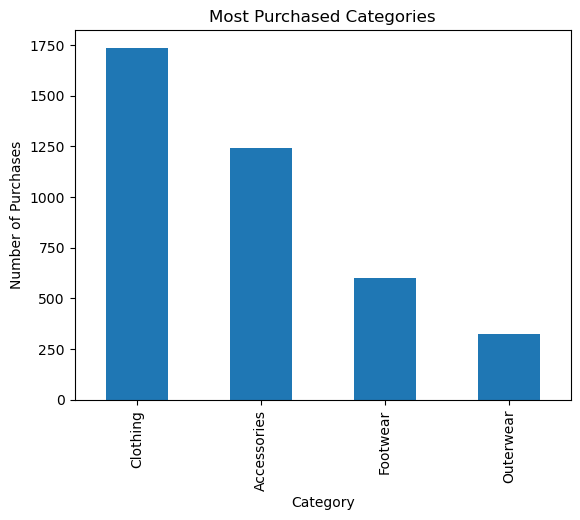

In [26]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', title='Most Purchased Categories')
plt.ylabel('Number of Purchases')
plt.show()

<h2 style="color:orange">Age & Gender Effect</h2>

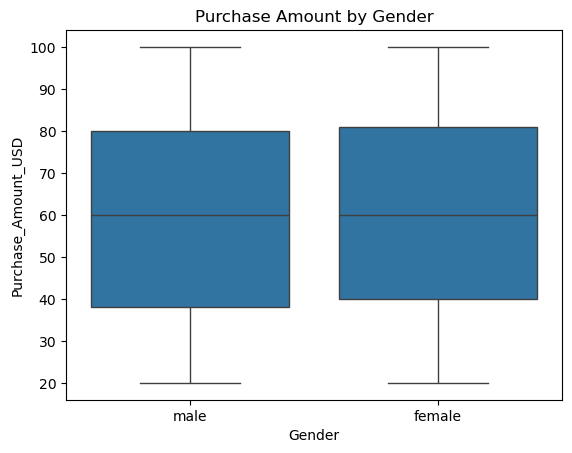

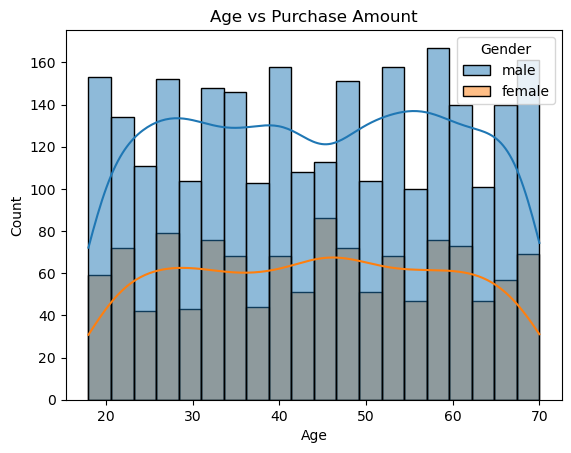

In [28]:
sns.boxplot(data=df, x='Gender', y='Purchase_Amount_USD')
plt.title('Purchase Amount by Gender')
plt.show()
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title('Age vs Purchase Amount')
plt.show()

<h2 style="color:orange">Discounts / Promo Codes Effect</h2>

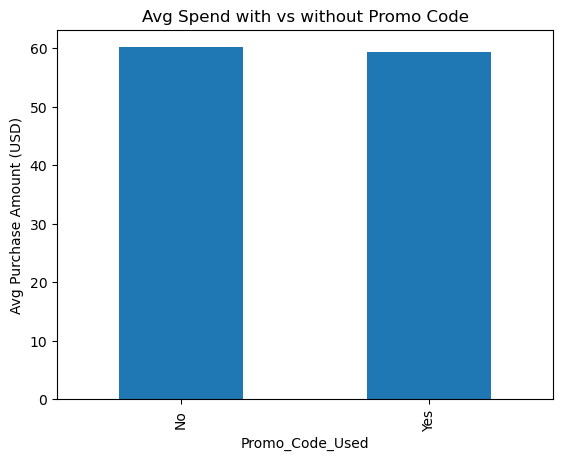

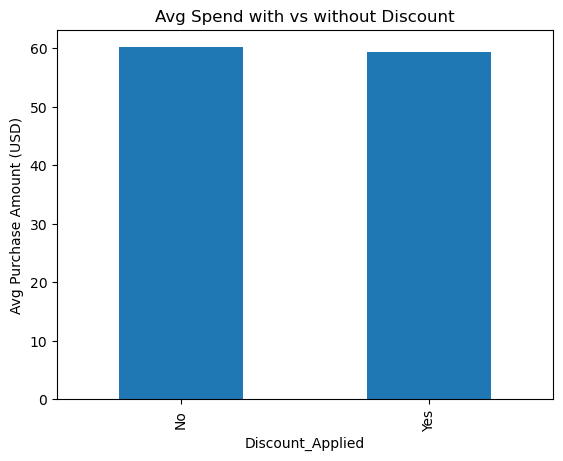

In [79]:
promo_avg = df.groupby('Promo_Code_Used')['Purchase_Amount_USD'].mean()
promo_avg.plot(kind='bar', title='Avg Spend with vs without Promo Code', ylabel='Avg Purchase Amount (USD)')
plt.show()

discount_avg = df.groupby('Discount_Applied')['Purchase_Amount_USD'].mean()
discount_avg.plot(kind='bar', title='Avg Spend with vs without Discount', ylabel='Avg Purchase Amount (USD)')
plt.show()

<h2 style="color:orange">Sales by Location</h2>

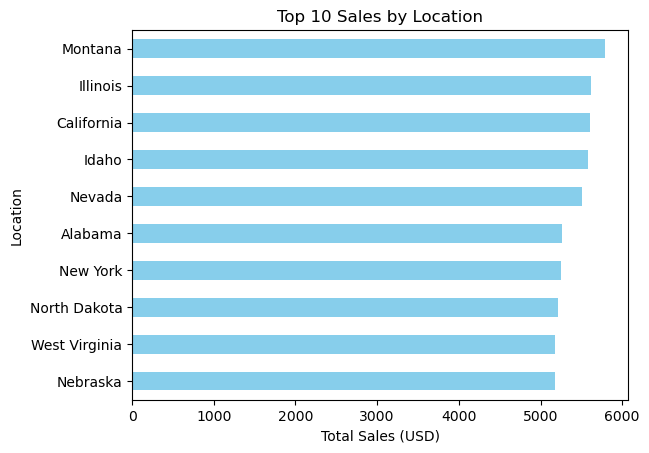

In [59]:
top_locations = location_sales.head(10)  
top_locations.plot(kind='barh', title='Top 10 Sales by Location', color='skyblue')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Location')
plt.gca().invert_yaxis()  
plt.show()

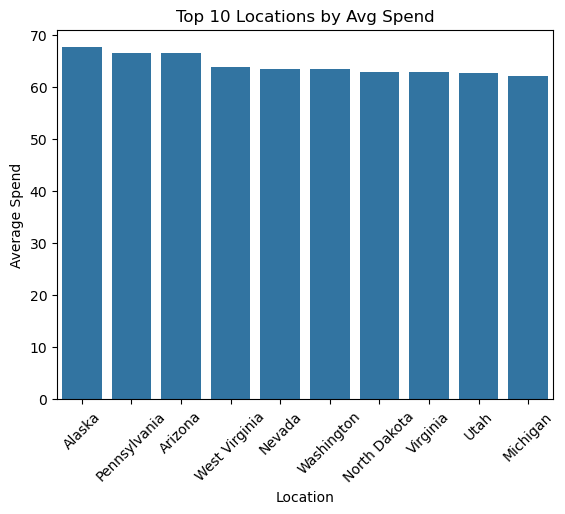

In [62]:
avg_spend_location = df.groupby('Location')['Purchase_Amount_USD'].mean().sort_values(ascending=False)
top_avg_spend = avg_spend_location.head(10).reset_index()
sns.barplot(data=top_avg_spend, x='Location', y='Purchase_Amount_USD')
plt.title('Top 10 Locations by Avg Spend')
plt.xticks(rotation=45)
plt.ylabel('Average Spend')
plt.show()

<h2 style="color:orange">Preferred Payment / Shipping Method</h2>

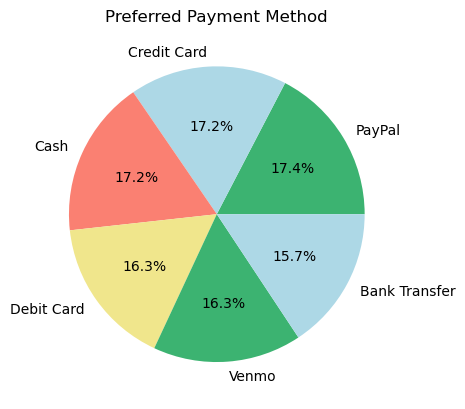

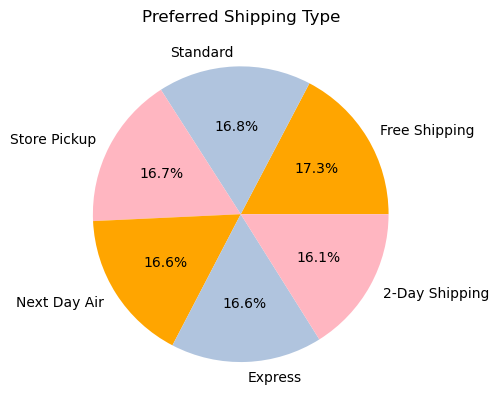

In [75]:
df['Preferred_Payment_Method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Preferred Payment Method',
    ylabel='',
    colors=['mediumseagreen', 'lightblue', 'salmon', 'khaki']
)
plt.show()

df['Shipping_Type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Preferred Shipping Type',
    ylabel='',
    colors=['orange', 'lightsteelblue', 'lightpink']
)
plt.show()

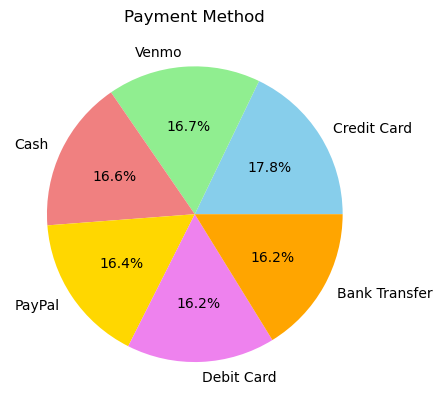

In [76]:
df['Payment_Method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Payment Method',
    ylabel='', 
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet' , 'orange']  
)
plt.show()

<h2 style="color:orange">Spending by Age Group & Gender</h2>

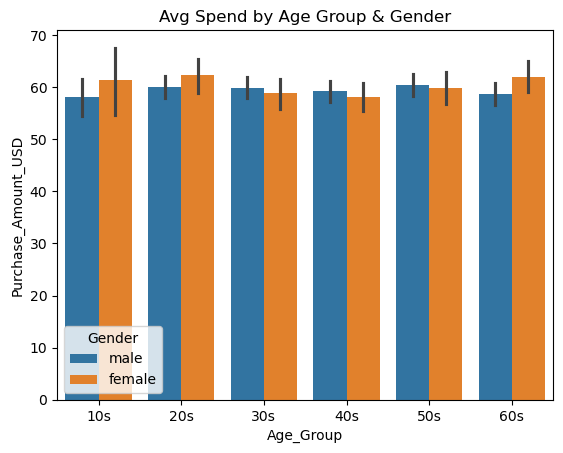

In [35]:
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['10s', '20s', '30s', '40s', '50s', '60s'])
sns.barplot(data=df, x='Age_Group', y='Purchase_Amount_USD', hue='Gender', estimator='mean')
plt.title('Avg Spend by Age Group & Gender')
plt.show()

<h2 style="color:orange">Average Spend by Season</h2>

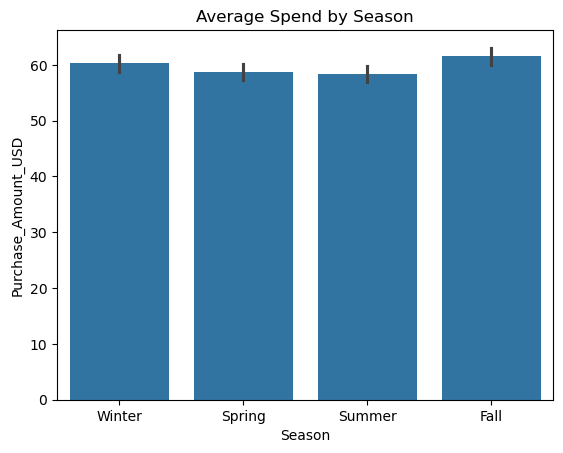

In [60]:
sns.barplot(data=df, x='Season', y='Purchase_Amount_USD', estimator='mean')
plt.title('Average Spend by Season')
plt.show()

<h2 style="color:orange"> Do Promo Codes Increase Spending?</h2>

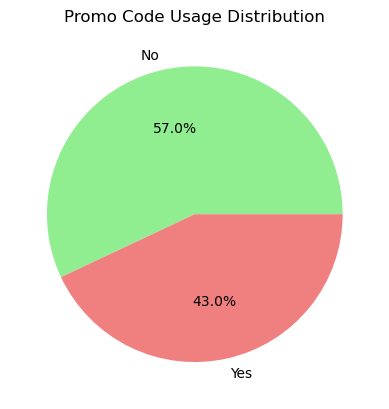

In [69]:
promo_counts = df['Promo_Code_Used'].value_counts()
promo_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Promo Code Usage Distribution')
plt.ylabel('') 
plt.show()

<h2 style="color:orange">Do Subscribers Spend More?</h2>

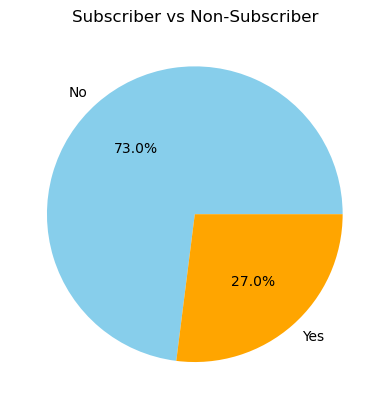

In [68]:
subscription_counts = df['Subscription_Status'].value_counts()
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Subscriber vs Non-Subscriber')
plt.ylabel('')
plt.show()

<h2 style="color:orange">Highest Rated Categories</h2>

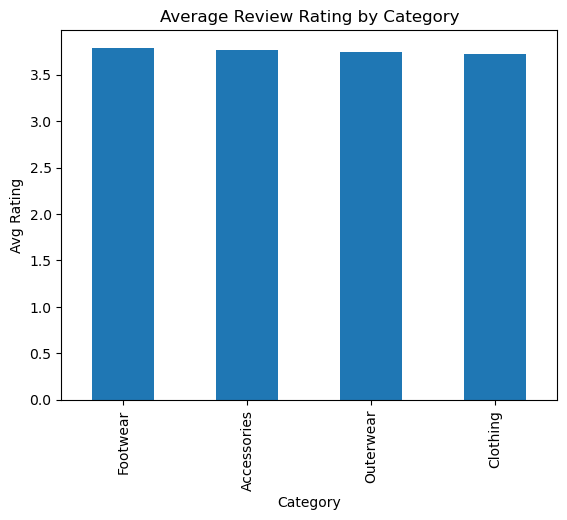

In [46]:
category_ratings = df.groupby('Category')['Review_Rating'].mean().sort_values(ascending=False)
category_ratings.plot(kind='bar', title='Average Review Rating by Category')
plt.ylabel('Avg Rating')
plt.show()